In [32]:
# Imports
from h3 import h3

# Visualization
import matplotlib.pyplot as plt
import folium
import contextily as ctx

# Data handling
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon


In [33]:
#Read and format Shape Files
labota_shp = gpd.read_file("C:/Users/diana/Documents/healthy_citys/healthy_citys/LaBotayToctiuco/CENSOLABOTA/CENSO.shp")
labota_shp = labota_shp.to_crs('epsg:4326') # lat lon format

<AxesSubplot: >

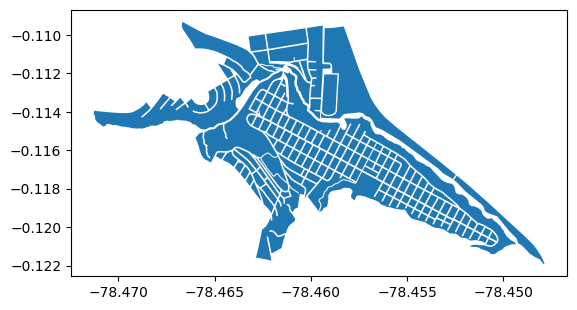

In [34]:
labota_shp.plot()

In [35]:
# Extract the bounding box of the labota_shp
bbox = labota_shp.total_bounds
polygon = Polygon([(bbox[0], bbox[1]), (bbox[0], bbox[3]), (bbox[2], bbox[3]), (bbox[2], bbox[1])])
#Get the centroid of the bounding box
centroid = polygon.centroid
#Print the centroid coordinates
print(centroid.x, centroid.y)

-78.45956887257326 -0.11562405304648693


In [37]:
# Set the H3 resolution
resolution = 10 # choose the desired H3 resolution
#cell_size = 15 - resolution # calculate the H3 cell size based on the resolution

In [46]:
polygon = {
'type': 'Polygon',
'coordinates': [
[
[bbox[1], bbox[0]],
[bbox[1], bbox[2]],
[bbox[3], bbox[2]],
[bbox[3], bbox[0]],
[bbox[1], bbox[0]]
]
]
}

resolution = 10
hexagons = h3.polyfill(polygon, resolution, geo_json_conformant=False)
hexagons_list = list(hexagons)

In [47]:
hexagons_list

['8a66d3312b4ffff',
 '8a66d331045ffff',
 '8a66d3312a0ffff',
 '8a66d33106dffff',
 '8a66d3312347fff',
 '8a66d3312147fff',
 '8a66d33123affff',
 '8a66d3313d1ffff',
 '8a66d33107affff',
 '8a66d3313cb7fff',
 '8a66d3313837fff',
 '8a66d33104effff',
 '8a66d3310617fff',
 '8a66d3312ba7fff',
 '8a66d33120e7fff',
 '8a66d331079ffff',
 '8a66d3312127fff',
 '8a66d3312acffff',
 '8a66d3310707fff',
 '8a66d331065ffff',
 '8a66d3312bb7fff',
 '8a66d3312337fff',
 '8a66d331200ffff',
 '8a66d331066ffff',
 '8a66d3313d8ffff',
 '8a66d3313ca7fff',
 '8a66d33107a7fff',
 '8a66d3312ae7fff',
 '8a66d331072ffff',
 '8a66d3312b77fff',
 '8a66d3312067fff',
 '8a66d33128d7fff',
 '8a66d3312ab7fff',
 '8a66d3312037fff',
 '8a66d331236ffff',
 '8a66d3313db7fff',
 '8a66d3313d57fff',
 '8a66d331060ffff',
 '8a66d3310647fff',
 '8a66d3312a17fff',
 '8a66d3310787fff',
 '8a66d331212ffff',
 '8a66d3312af7fff',
 '8a66d33128effff',
 '8a66d33139a7fff',
 '8a66d3310737fff',
 '8a66d3312367fff',
 '8a66d3312a87fff',
 '8a66d331211ffff',
 '8a66d3312387fff',


In [48]:
polygonise = lambda hex_id: Polygon(
                                h3.h3_to_geo_boundary(
                                    hex_id, geo_json=True)
                                    )

all_polys = gpd.GeoSeries(list(map(polygonise, hexagons)), \
                                      index=hexagons, \
                                      crs="EPSG:4326" \
                                     )

<AxesSubplot: >

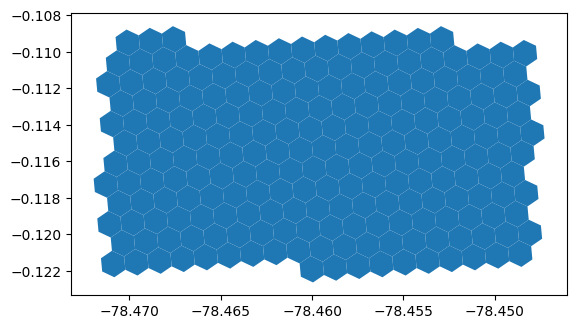

In [49]:
all_polys.plot()

In [50]:
all_polys.head()

8a66d3312b4ffff    POLYGON ((-78.45761 -0.11334, -78.45821 -0.113...
8a66d331045ffff    POLYGON ((-78.45548 -0.10880, -78.45608 -0.109...
8a66d3312a0ffff    POLYGON ((-78.46068 -0.11466, -78.46128 -0.115...
8a66d33106dffff    POLYGON ((-78.45341 -0.11740, -78.45401 -0.117...
8a66d3312347fff    POLYGON ((-78.46208 -0.12024, -78.46268 -0.120...
dtype: geometry

In [56]:
# Create a folium map centered on LaBota
latitude = -0.11562405304648693
longitude = -78.45956887257326
m = folium.Map(location=[-0.12192121, -78.47128883], zoom_start=10 )
folium.GeoJson(all_polys).add_to(m)

In [59]:
display(m)